## Task 1 : Data Cleaning and Preprocessing

### Import Libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler


### Load Dataset

In [20]:
data = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/heart_disease_uci.csv")

In [23]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [25]:
data.shape

(920, 16)

In [26]:
print("\nMissing values:\n", data.isnull().sum().sort_values(ascending=False))


Missing values:
 ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64


In [27]:
print("\nData types:\n", data.dtypes)


Data types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


### Handle missing values

In [28]:
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
cat_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [29]:
data[num_cols] =  SimpleImputer(strategy='median').fit_transform(data[num_cols])
data[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(data[cat_cols])

### Encode categorical variables

In [30]:
data = pd.get_dummies(data, columns=cat_cols, drop_first = True)

###  Standardize numerical columns

In [33]:
scale_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
data[scale_cols] = StandardScaler().fit_transform(data[scale_cols])

### Visualize outliers

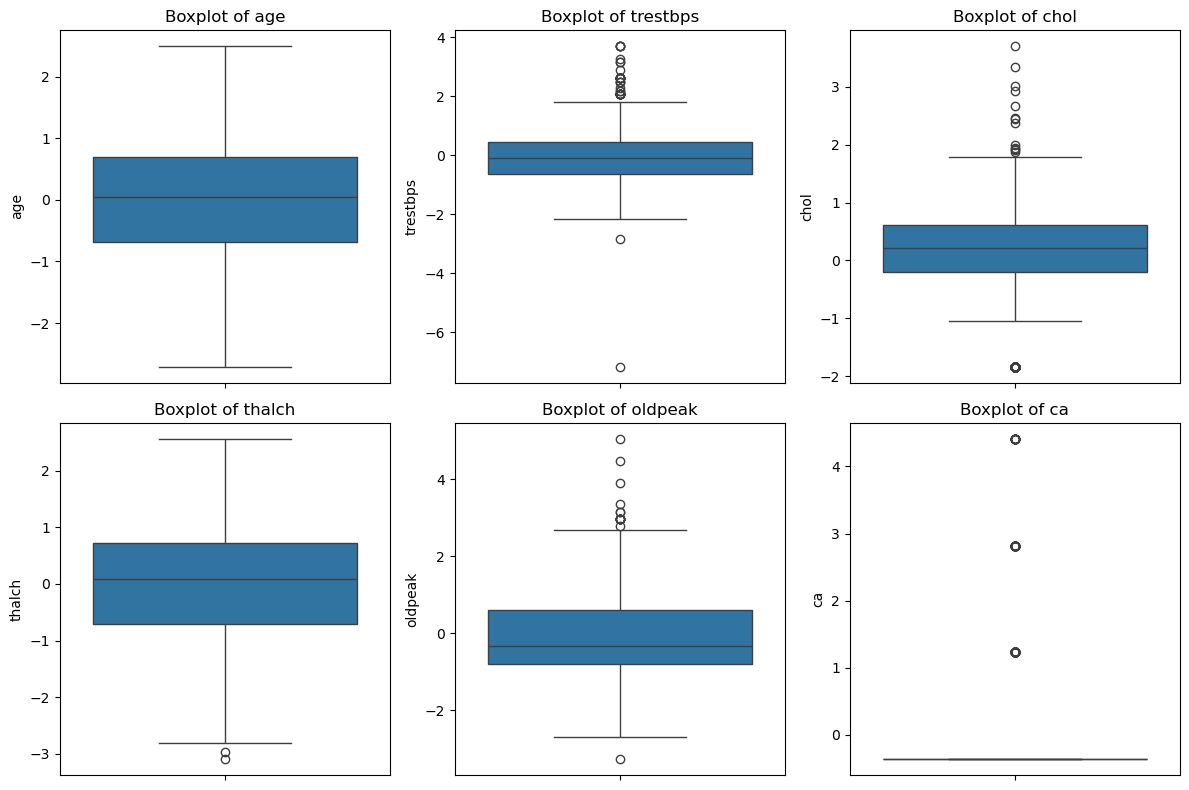

In [39]:
plt.figure(figsize = (12,8))
for i, col in enumerate (scale_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Remove outliers using IQR

In [41]:
for col in scale_cols:
    Q1 = data[col].quantile(0.25)
    Q3 =  data[col].quantile(0.75)
    IQR = Q3-Q1
    lower  = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower) & (data[col]  <= upper)]

#Final Shape
print("\n Cleaned data shape:", data.shape)


 Cleaned data shape: (578, 23)


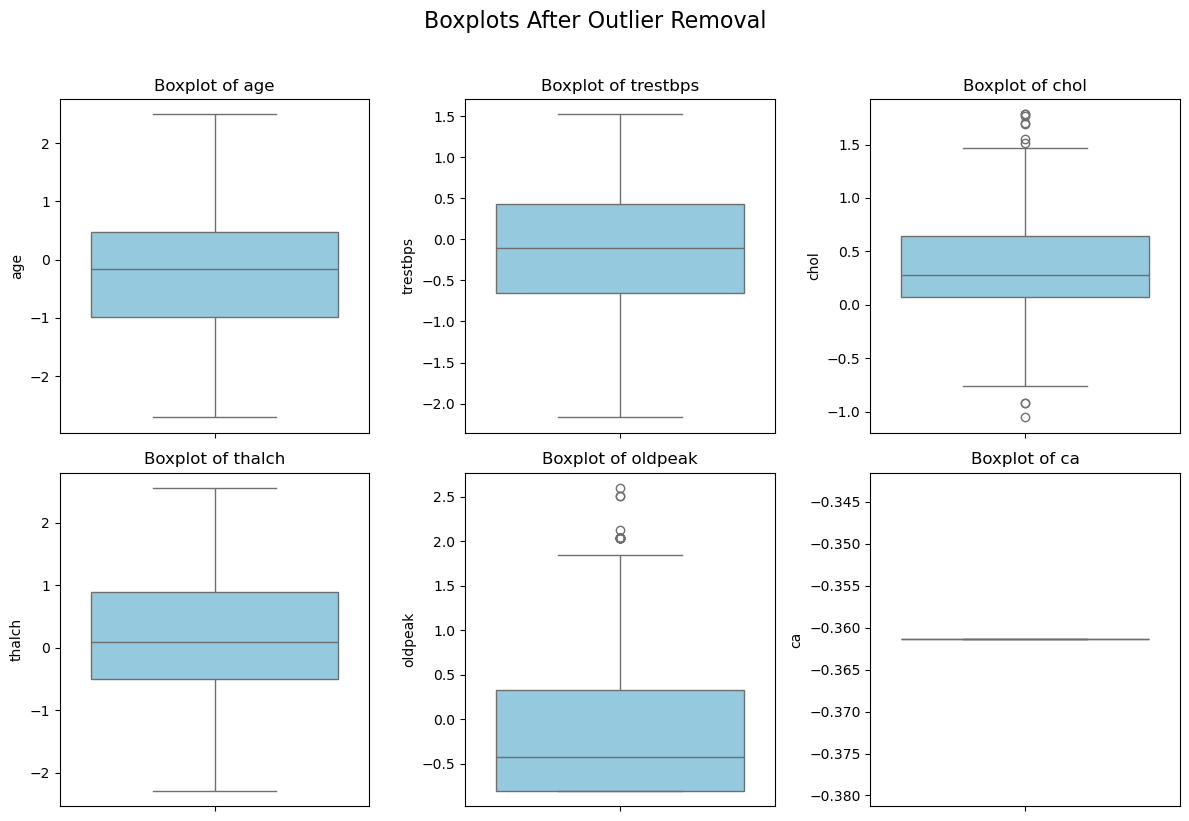

In [43]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(scale_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Boxplots After Outlier Removal", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()